# Import Librararies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Import data

In [4]:
iris = datasets.load_iris()

In [58]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
type(iris)

sklearn.utils._bunch.Bunch

In [6]:
data = iris.data

In [7]:
data[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

## Some Visualizations

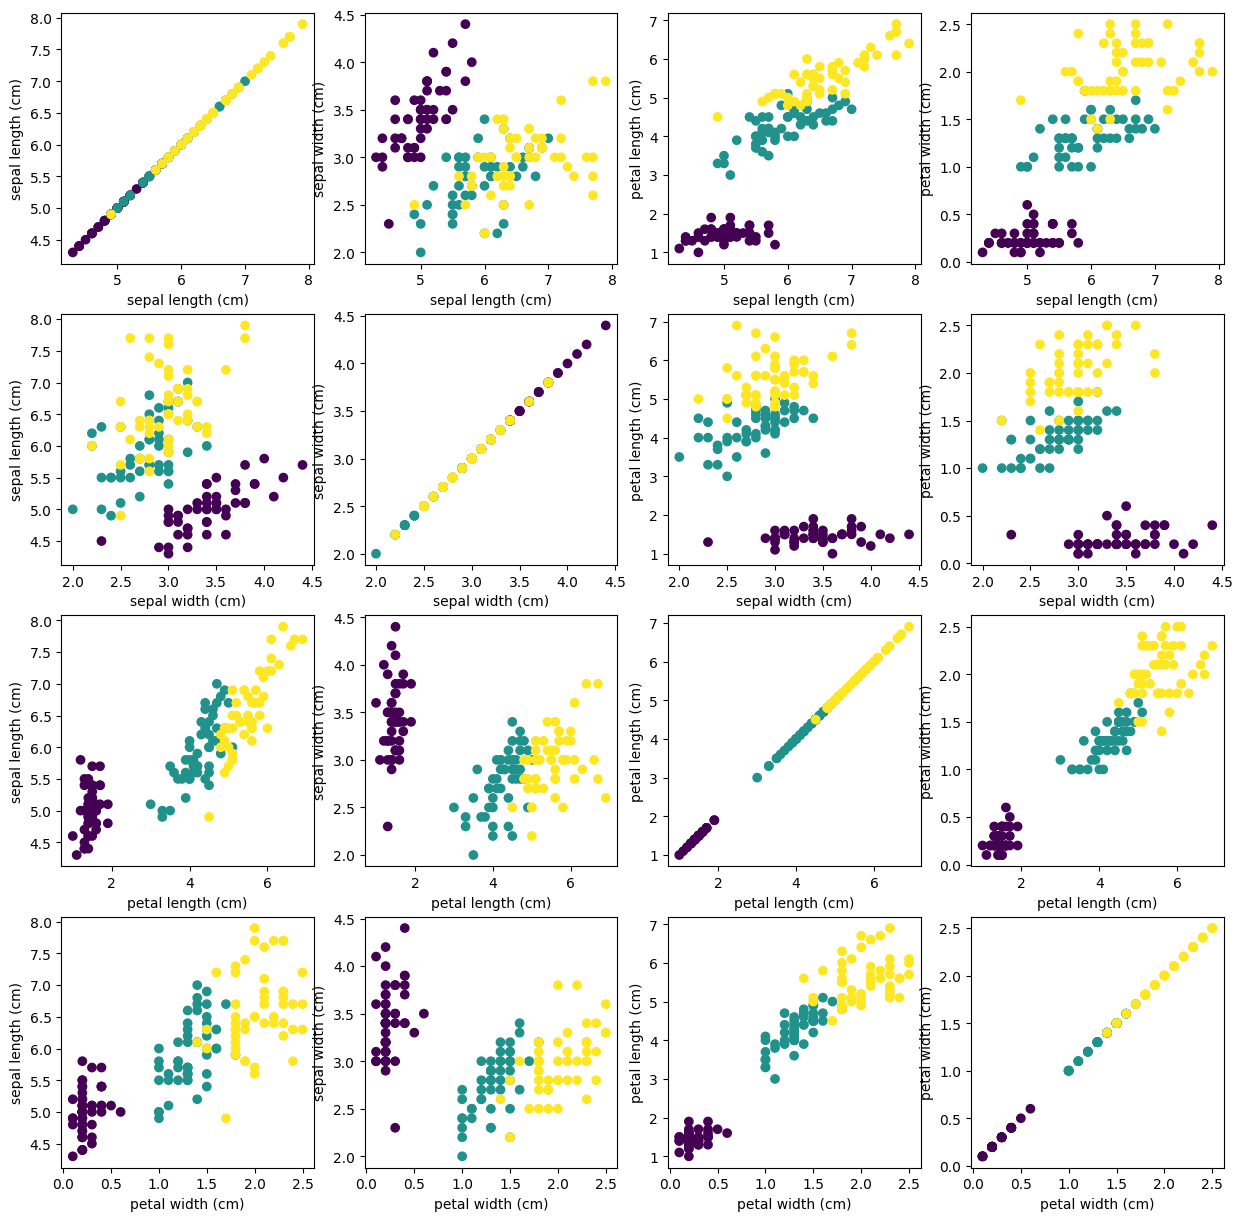

In [8]:
fig,ax = plt.subplots(4,4,figsize=(15,15))

for i in range(4):
    for j in range(0,4,1):
        ax[i][j].scatter(data[:,i],data[:,j],c=iris.target)
        ax[i][j].set_xlabel(iris.feature_names[i])
        ax[i][j].set_ylabel(iris.feature_names[j])

### Model Prediction

In [12]:
from sklearn.cluster import KMeans

In [31]:
from sklearn.metrics import silhouette_score

## Plotting sihouette scores and inertia scores for different values of k

In [55]:
def plot_different_scores():
    inertias = []
    scores  = [] 
    ks = [2,3,4,5,6]
    for k in ks:
        kmodel = KMeans(n_clusters=k,random_state=42)
        y_pred = kmodel.fit_predict(data)
        scores.append(silhouette_score(data,kmodel.labels_))
        inertias.append(kmodel.inertia_)
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].plot(ks,scores,marker='o',color='lime')
    ax[0].set_xlabel("K values")
    ax[0].set_ylabel("sihoutte scores")
    ax[1].plot(ks,inertias,marker = 'o')
    ax[1].set_xlabel("K values")
    ax[1].set_ylabel("inertia scores")

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

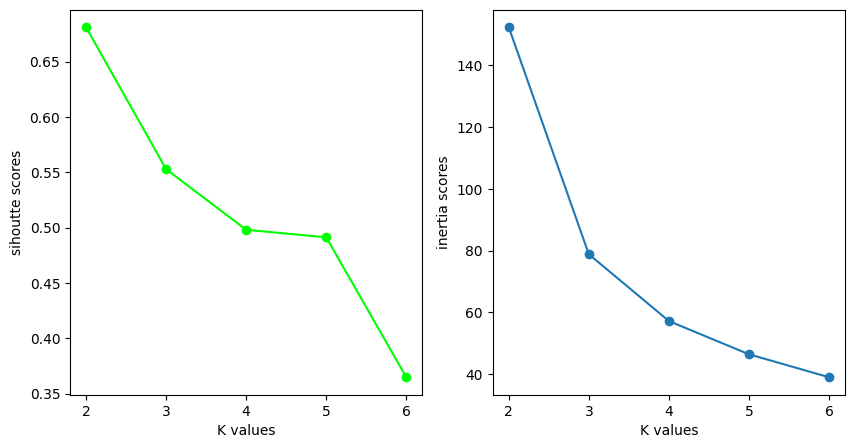

In [56]:
plot_different_scores()

In [72]:
k = 3
kmodel = KMeans(n_clusters=k,random_state=42)
y_pred = kmodel.fit_predict(data)

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## adjusting values of predict to match real target

In [73]:
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        y_pred[i] = 1
    elif y_pred[i] == 1:
        y_pred[i] = 0

### Model accuracy

In [74]:
pd.crosstab(iris.target,kmodel.labels_)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,48,2
2,0,14,36
